### Data Collection & Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import time
import os
import shutil
import numpy as np
import torch
import random

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt


import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torchvision.datasets as datasets


Data Processing and Augmentation

In [3]:
# Define a custom transformation for rotation of 45 degrees with 50% chance
class RandomRotation(object):
    def __call__(self, img):
        if random.random() < 0.5:
            return img.rotate(45)
        return img

In [9]:
# Define a custom transformation for rotation of 45 degrees with 50% chance
class RandomRotation(object):
    def __call__(self, img):
        if random.random() < 0.5:
            return img.rotate(45)
        return img

def get_mean_std(data):
  mean = torch.zeros(3)
  std = torch.zeros(3)
  num_samples = len(dataset)
  for images, _ in loader:
      mean += images.mean(dim=(0, 2, 3))
      std += images.std(dim=(0, 2, 3))
  mean /= num_samples
  std /= num_samples
  return mean*255, std*255


'''
def get_mean_std(loader):
    # Compute the mean and standard deviation of all pixels in the dataset
    num_pixels = 0
    mean = 0.0
    std = 0.0
    for images, _ in loader:
        batch_size, num_channels, height, width = images.shape
        num_pixels += batch_size * height * width
        mean += images.mean(axis=(0, 2, 3)).sum()
        std += images.std(axis=(0, 2, 3)).sum()

    mean /= num_pixels
    std /= num_pixels

    return mean, std'''

'''def get_mean_std(data):
  loader = torch.utils.data.DataLoader(data, batch_size = 1000, num_workers=1)
  num_of_pixels = len(data)*128*128

  total_sum = 0
  for batch in loader:
    total_sum += batch[0].sum()
  mean = total_sum/num_of_pixels

  sum_of_squared_error = 0
  for batch in loader:
    sum_of_squared_error += ((batch[0]-mean).pow(2)).sum()
  std = torch.sqrt(sum_of_squared_error/num_of_pixels)'''

data_dir = "/content/gdrive/My Drive/APS360 Project Dataset/"
# Compose transformations: Resize, ToTensor to apply normalization
data_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(data_dir, transform=data_transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

mean, std = get_mean_std(dataset)
print(mean, std)
# Load and transform data using ImageFolder
# Compose transformations: Resize, RandomHorizontalFlip, RandomRotation, ToTensor, Normalize
data_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    RandomRotation(),
    transforms.ToTensor()
    #,transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])
all_data = datasets.ImageFolder(data_dir, transform=data_transform)


#define waste classes - folders in each directory with these names
classes = ['Glass', 'Metal', 'Paper', 'Plastic']

data_loader = torch.utils.data.DataLoader(all_data, batch_size=10,
                                           num_workers=1, shuffle=True)
for images, _ in data_loader:
  print(images.shape)
  print(images)
  break
'''val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)'''
#mean, std = get_mean_std(all_data)

# Print out some data stats
print('Num images: ', len(all_data))


KeyboardInterrupt: 

Data Augmentation: For each image there will be a 50% chance of horizontal inversion,
and a 50% chance of a rotation of 45 degrees. Additionally we will normalize each image along
each of the R, G, and B channels to have a mean of zero and a variance of one, centering the data on
0.

Visualize Some Data

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    

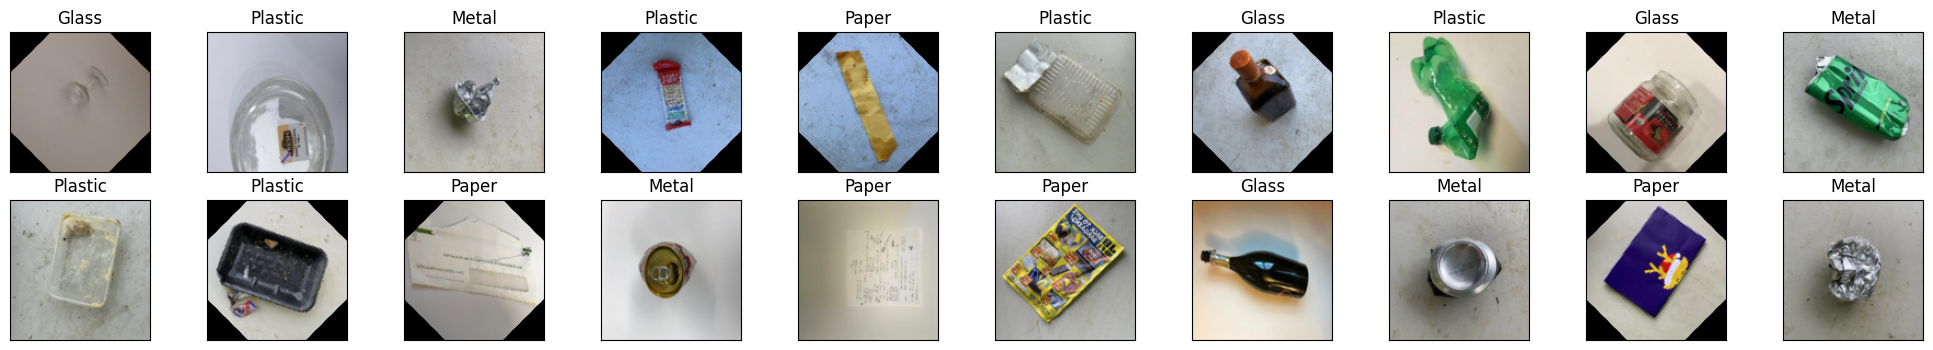

In [ ]:
classes = ['Glass', 'Metal', 'Paper', 'Plastic']

data_loader = torch.utils.data.DataLoader(all_data, batch_size=30,
                                           num_workers=1, shuffle=True)
# obtain one batch of training images
dataiter = iter(data_loader)
images, labels = next(dataiter)
#images = images * std.view(1, 3, 1, 1) + mean.view(1, 3, 1, 1)  #To denormalize
images = images.numpy() # convert images to numpy for display
print(images)
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

### Building ANN

ANN Structure & Explanation:
Using Tutorial 2 (Multi-Class ANN) modified the 3-layer ANN with ReLU activation functions applied on the first and second hidden layers. The softmax activation will be used for outputting class probabilities and is not included in the architecture setup.


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed

class ANNWasteClassifier(nn.Module):
    def __init__(self):
        super(ANNWasteClassifier, self).__init__()
        self.layer1 = nn.Linear(3*128*128, 500)
        self.layer2 = nn.Linear(500, 80)
        self.layer3 = nn.Linear(80, 4) #output is 4 classes
    def forward(self, img):
        flattened = img.view(-1, 3*128*128)
        activation1 = F.relu(self.layer1(flattened))
        activation2 = F.relu(self.layer2(activation1))
        output = self.layer3(activation2)
        return output

model = ANNWasteClassifier()

print('done')

done


Training Code

In [5]:
def get_accuracy(model, train=False):
    if train:
        data = debug_data
    else:
        data = debug_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64): #iterate through data points
        output = model(imgs) #get output of network
        #if debug: #TAs test
          #print("OUTPUT:", output.max(1,keepdim=True))
          #str_in = input()
          #if str_in == 'stop':
            #debug = False
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1] #select index with maximum prediction score
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

print ('done')

done


In [6]:
def train(model, data, batch_size=64, num_epochs=1 , print_stat = 1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    #define a dataloader object that given the data set alows you to iterate through your dataset. in this case, spec. batch size is gonna make train loader iterate through batch size points
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #each update, how much memory

    iters, losses, train_acc, val_acc = [], [], [], [] #save history of iterations

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    if print_stat:
      # plotting
      plt.title("Training Curve")
      plt.plot(iters, losses, label="Train")
      plt.xlabel("Iterations")
      plt.ylabel("Loss")
      plt.show()

      plt.title("Training Curve")
      plt.plot(iters, train_acc, label="Train")
      plt.plot(iters, val_acc, label="Validation")
      plt.xlabel("Iterations")
      plt.ylabel("Training Accuracy")
      plt.legend(loc='best')
      plt.show()

      print("Final Training Accuracy: {}".format(train_acc[-1]))
      print("Final Validation Accuracy: {}".format(val_acc[-1]))



print('done')

done


Checking if code can overfit on single batch

In [7]:
data_dir = "/content/gdrive/My Drive/APS360 Project Dataset/mini trainset/"
# Compose transformations: Resize, RandomHorizontalFlip, RandomRotation, ToTensor, Normalize
data_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    RandomRotation(),
    transforms.ToTensor()
    #,transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])
debug_data = datasets.ImageFolder(data_dir, transform=data_transform)
model = ANNWasteClassifier()
print(f"Model batch size: {next(model.parameters()).shape[0]}")
print(f"Data batch size: {next(iter(debug_data))[0].shape[0]}")
train(model, debug_data, batch_size = 1, num_epochs=10, print_stat=1)

Model batch size: 500
Data batch size: 3


KeyboardInterrupt: 

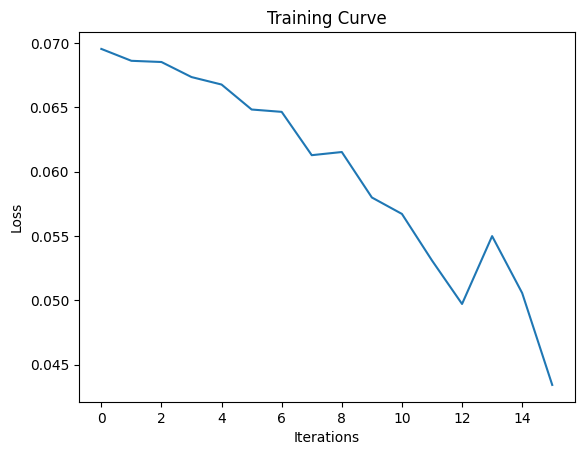

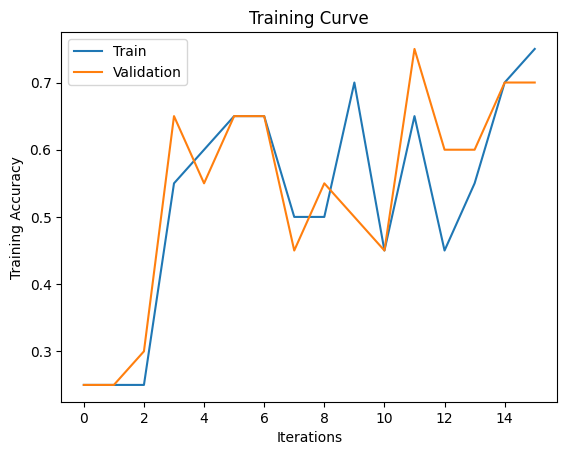

Final Training Accuracy: 0.75
Final Validation Accuracy: 0.7


In [8]:
#proper model
model = ANNWasteClassifier()
train(model, debug_data, batch_size=20, num_epochs=16)

image dimensions:  torch.Size([3, 128, 128])
output dimensions:  torch.Size([1, 4])
output probabilities:  tensor([[0.2377, 0.2540, 0.2604, 0.2480]], grad_fn=<SoftmaxBackward0>) sum:  tensor(1., grad_fn=<SumBackward0>)
output:  2 with a probability of 0.26035770773887634
label:  tensor(2)


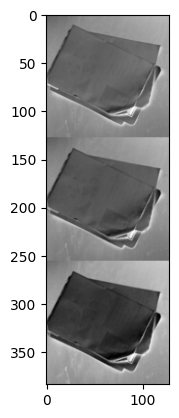

In [23]:
debug_loader = torch.utils.data.DataLoader(debug_data, batch_size=20,
                                           num_workers=1, shuffle=True)
for images, labels in debug_loader:
    # Get the first image from the batch
    image = images[0]
    label = labels[0]
    break  # Break after fetching the first batch
#plot sample image
print('image dimensions: ', image.shape)
plt.imshow(image.view(-1,128),cmap='Greys') #make image 128 x 128 (not 1 x 28 x 28 as required by model)

#test new image
out = model(image)
prob = F.softmax(out, dim=1)
print('output dimensions: ', out.shape)
print('output probabilities: ', prob, 'sum: ', torch.sum(prob))

#print max index and compare with label
print('output: ', prob.max(1, keepdim=True)[1].item(), 'with a probability of', prob.max(1, keepdim=True)[0].item())
print('label: ', label)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    # Train a classifier on cats vs dogs
    classes = ['Glass', 'Metal', 'Paper', 'Plastic']
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
